In [6]:
import pandas as pd
import re

def preprocess(x):
    x = re.sub("<br\\s*/?>", " ", x)
    return x   

df = (
    pd.read_csv("data/IMDB Dataset.csv")
    .assign(review=lambda df: df['review'].apply(preprocess))
)
 
print(df.head())
print(df.shape)
print(df['sentiment'].value_counts(normalize=True))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production.   The filming t...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
(50000, 2)
positive    0.5
negative    0.5
Name: sentiment, dtype: float64


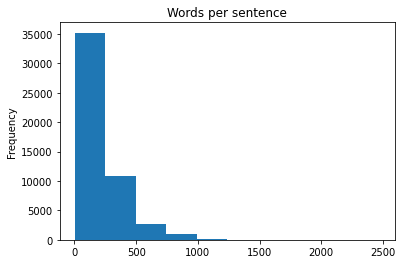

In [11]:
(
    df['review']
    .str.split(' ')
    .str.len()
    .plot.hist(title='Words per sentence')
);

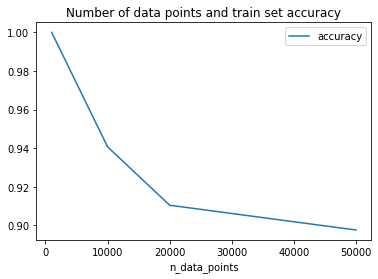

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def make_model():
    return Pipeline([
        ('d2v', CountVectorizer(
            max_features=10000,
            max_df=0.95, min_df=0.01)),
        ('classifier', LogisticRegression(
            solver='saga', max_iter=5000)
        )
    ])


def get_x_y(df):
    X = df['review'].values
    y = (df['sentiment'] == 'positive').values
    return X, y

def results(df,  n_data_points=[100, 500]):
    for n_data_point in n_data_points:
        sample = df.sample(n_data_point, random_state=0)
        X, y = get_x_y(sample)
        
        model = make_model()
        model.fit(X, y)
        a = accuracy_score(y, model.predict(X))
        
        yield {
            'n_data_points': n_data_point,
            'accuracy': a
        }

        
(
    pd.DataFrame(results(
        df,
        n_data_points=[1000, 10000, 20000, len(df)]
    ))
    .set_index('n_data_points')
    .plot(title='Number of data points and train set accuracy')
);